<a href="https://colab.research.google.com/github/Ssendags/Data-science-Project-2---Denis-Ssendagire/blob/main/Ssendagire_Denis_Project_2_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset:**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, etc.

It is a classification problem.

In [273]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [274]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Adult Income.xlsx"
df = pd.read_excel(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  float64
 1   workclass        48842 non-null  object 
 2   fnlwgt           48842 non-null  float64
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  float64
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


No null values found in the dataset.

In [276]:
df.duplicated().sum()

52

In [277]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

Check for inconsistencies.

In [278]:
# Checking for Inconsistencies in categorical values. No inconsistencies found
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

It is noticed from return above that missing values are returned as "?"

In [279]:
# Replace all "?" values id dataframe with NaN.
import numpy as np
df = df.replace("?", np.NaN)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [280]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

Identifying and correcting incosistencies for categorical data.

In [281]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

All categorical values were checked and found with no incosistencies.

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of People per Income Group')

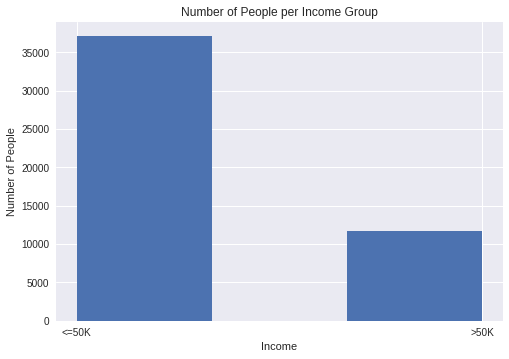

In [283]:
# Univariate Visualisation for target (income)
df['income'].hist(bins = 3)
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.title('Number of People per Income Group')

Text(0.5, 1.0, 'Number of People per Marital Status')

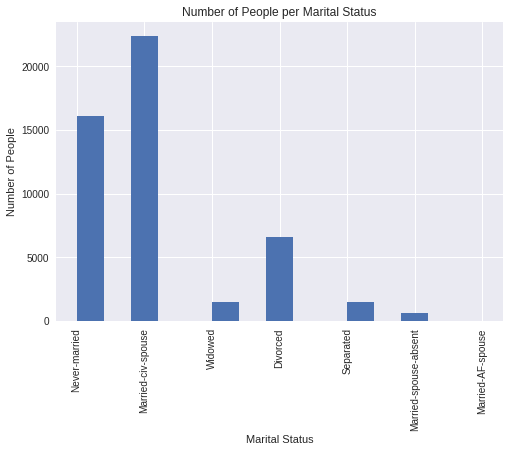

In [284]:
# Univariate visualisation for feature marital-status
df['marital-status'].hist(bins=15)
plt.xticks(rotation = 90)
plt.xlabel('Marital Status')
plt.ylabel('Number of People')
plt.title('Number of People per Marital Status')

Text(0.5, 1.0, 'Number of People per Race')

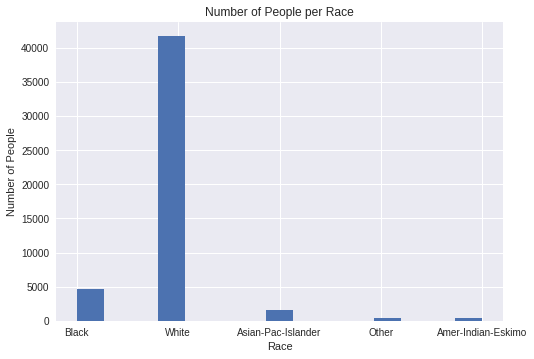

In [285]:
# Univariate visualisation for feature marital-status
df['race'].hist(bins=15)
plt.xlabel('Race')
plt.ylabel('Number of People')
plt.title('Number of People per Race')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


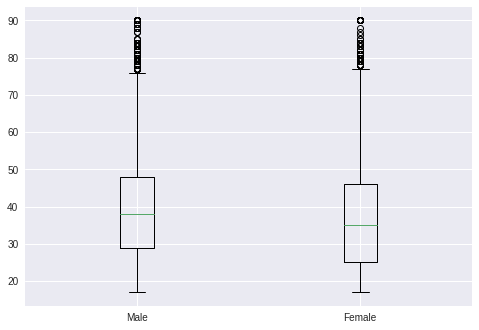

In [286]:
# Bivariate Visualisation for Gender and Age using Matplotlib.
male = df.loc[df["gender"] == "Male","age"].values
female = df.loc[df["gender"] == "Female","age"].values
plt.boxplot([male,female], labels=["Male", "Female"]);

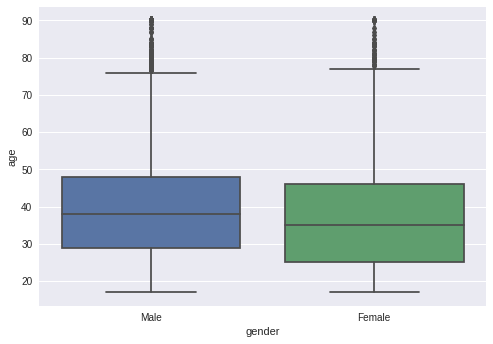

In [287]:
# Bivariate Visualisation for Gender and Age using using seaborn
sns.boxplot(x="gender", y="age", data=df)

It is noticeable from the above visualisation that more of the those earning <=50k are below 40yrs and more of those earning >50k are above 40yrs.

Text(0.5, 1.0, 'Income for each Gender')

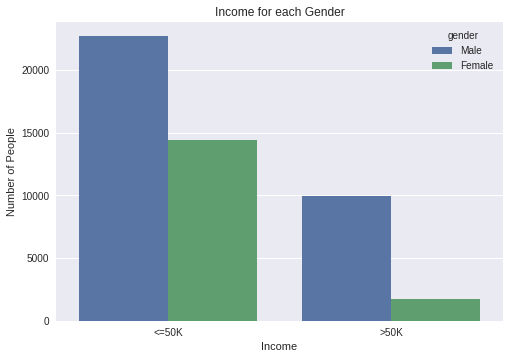

In [288]:
# Bivariate visualisation 
plt.style.use("seaborn")
sns.countplot(data=df, x="income", hue = "gender")
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.title('Income for each Gender')

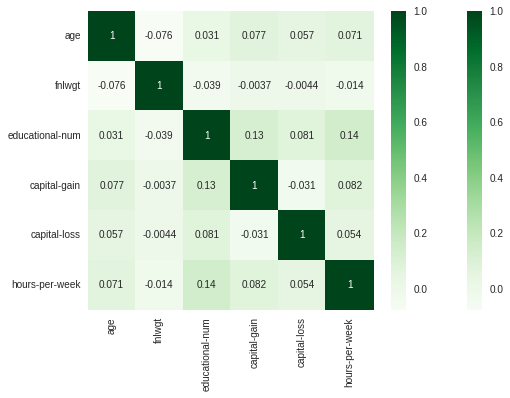

In [289]:
# After importing libraries and loading the data (df), the correllation coefficient can be checked as below:
corr =df.corr()
# A heat map is used to visualise the correlations.
sns.heatmap(corr, cmap = "Greens")
sns.heatmap(corr, cmap = "Greens", annot = True)

The heat map shows very low levels of correlation coefficients between the features.

Multivariate Visualisation: 

Exploring the relations between continuous variables and the ‘income’
column. To do that, we will plot a pair plot, with Hue as income.

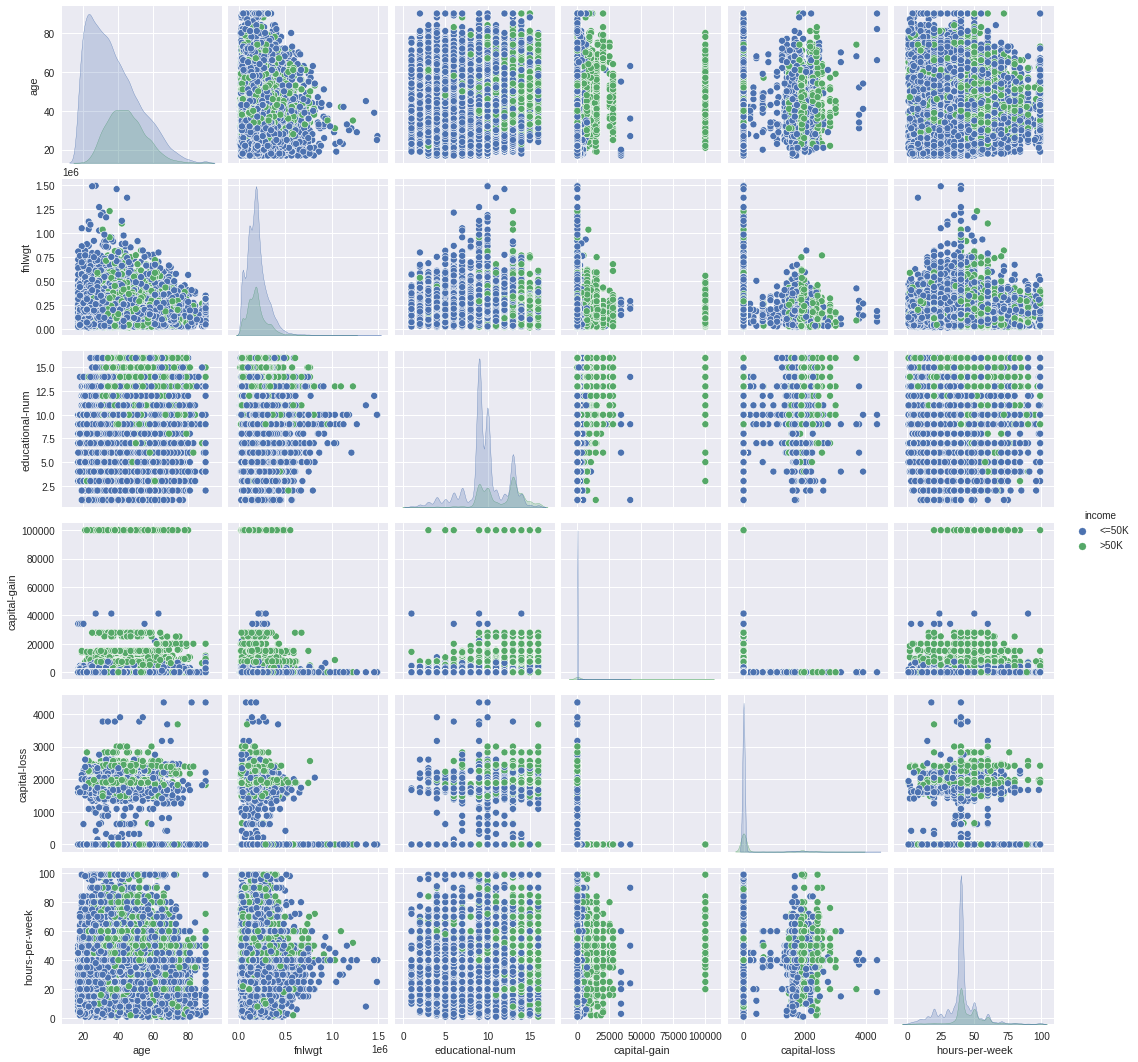

In [290]:
sns.pairplot(data=df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']],hue='income')

From the above multivariate visualisation there is no pattern seen in the plot confirming the earlier heatmap results where correlation coefficient was too low for the continuous variables.

Get the data into a form suitable for graphing.

In [291]:
# Get hours-per-week distribution for each age.
income_age = df.groupby(['age'])['hours-per-week'].nunique()

In [292]:
income_age_np = np.array(income_age.index)
income_age_np

array([17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90.])

In [293]:
numIncome = np.array(income_age.values)
numIncome

array([31, 47, 56, 52, 56, 58, 54, 55, 53, 50, 56, 53, 54, 57, 56, 56, 63,
       59, 52, 56, 57, 51, 53, 51, 55, 54, 55, 52, 59, 54, 57, 50, 49, 50,
       47, 51, 47, 39, 50, 43, 46, 44, 42, 40, 48, 47, 47, 38, 43, 39, 42,
       34, 35, 35, 34, 32, 35, 28, 25, 25, 20, 18, 13, 15, 21,  9,  6, 12,
        5,  1,  3,  3,  2, 18])

Text(0.5, 1.0, 'Hours-per-Week Worked by Age')

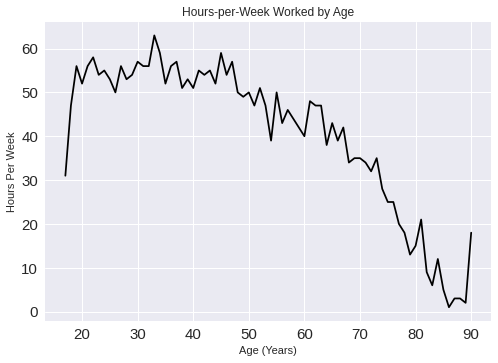

In [294]:
plt.style.use('seaborn')
plt.plot(income_age_np, numIncome, c= 'k')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age (Years)')
plt.ylabel('Hours Per Week')
plt.title('Hours-per-Week Worked by Age')

Hours per week worked indicates a declining trend with increasing age.

# **Preprocessing the Data**

Project 2- Part 4 (Core)
You are now entering into the model development phase of the project!

- Ensure that you complete the appropriate pre-processing steps
- Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model)
- Evaluate model performance with appropriate metrics for the model
- Choose your "production" model and justify this decision
- Go back through your code and ensure that you have provided clear comments
- Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.




# **Pre-processing the data.**

In [295]:
#  Ordinal encoding the target.
df['income'].replace({"<=50K":0, ">50K":1}, inplace=True)
df['income'].value_counts()

0    37109
1    11681
Name: income, dtype: int64

In [296]:
# The target we are trying to predict
y = df['income']
# The features we will use to make the prediction
X = df.drop(columns = 'income')

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [299]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [300]:
from sklearn.compose import make_column_selector

In [301]:
# Select the categorical columns.
cat_selector = make_column_selector(dtype_include = "object")
cat_selector(X_train)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [302]:
# Select numerical columns
num_selector = make_column_selector(dtype_include = "float")
num_selector(X_train)

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [303]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import set_config

In [304]:
df['income'].value_counts()

0    37109
1    11681
Name: income, dtype: int64

In [305]:
# Import libraries.
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import set_config
set_config(display='diagram')

In [306]:
# Instantiate column selectors for categorical and numerical columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [307]:
# Instantiate imputers for mean and most frequent strategy
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [308]:
# Instantiate standard scaler object
scaler = StandardScaler()

In [309]:
# Instantiate One-hot encoder object
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [310]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

In [311]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# Instantiate Column transformer object
preprocessor = make_column_transformer(number_tuple, category_tuple)

In [312]:
# Fit the preprocessor object on the train data and transform both train and test.
preprocessor.fit(X_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [313]:
X_test_processed_df = pd.DataFrame(X_test_processed)
X_test_processed_df

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.120136,0.466538,-0.033000,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.316126,-1.229991,1.133336,-0.145433,-0.217031,0.284810,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.707161,-0.532517,1.133336,0.980288,-0.217031,0.365171,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.608493,0.018884,1.133336,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.535401,-1.575022,-0.421779,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12193,-0.780252,0.071194,-0.421779,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12194,-0.707161,3.938574,1.133336,-0.145433,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12195,-0.926436,0.003486,1.133336,-0.145433,-0.217031,-0.840250,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12196,-0.560977,-0.314203,-0.421779,0.224275,-0.217031,-0.036636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0




# **Prepare and test model using Decision tree classification.**

> Indented block



In [314]:
from sklearn.tree import DecisionTreeClassifier

In [315]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [316]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

Predicting income.

In [317]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [318]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.9999726716222125
0.8155435317265125


Model is seen to make a perfect prediction on the training set and a fair one on the testing set.

Tuning the model further.

In [319]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [320]:
# max_depth is a none value, this parameter will be adjusted further to check for further improvement on the model.
# Get the tree depth
dec_tree.get_depth()

61

In [321]:
# Use a for loop to try many values at once.
max_depth_range = list(range(2, 61))
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train_processed, y_train)
  score = dec_tree.score(X_test_processed, y_test)
  r2.append(score)

Text(0, 0.5, 'r2')

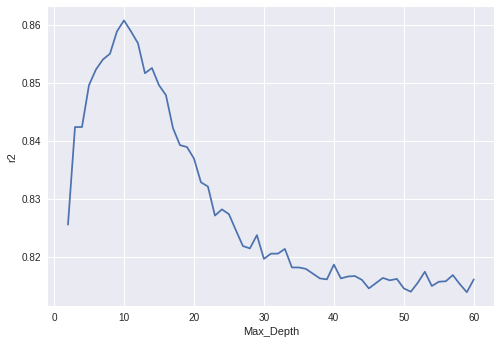

In [322]:
plt.plot(max_depth_range, r2)
plt.xlabel('Max_Depth')
plt.ylabel('r2')

From visualisation above, it looks like the best score for the model is when the parameter max_depth is 10

In [323]:
# Run the model with the best score
dec_tree_10 = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dec_tree_10.fit(X_train_processed, y_train)
train_10_score = dec_tree_10.score(X_train_processed, y_train)
test_10_score = dec_tree_10.score(X_test_processed, y_test)
print(train_10_score)
print(test_10_score)

0.8706001311762134
0.8607148712903755


The testing score is now higher, and the training and testing results are now closer, reducing the overfitting.



# **Preparing and testing model using Logistic Regression**

In [338]:
from sklearn.linear_model import LogisticRegression

In [340]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train_processed,y_train)
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.852344774814167
0.8507132316773242


Regularising using L1 Tuning to to see if we can improve the score.

{0.0001: 0.7597966879816364,
 0.001: 0.8294802426627316,
 0.01: 0.8519429414658141,
 0.1: 0.8506312510247581,
 1: 0.8507952123298902,
 10: 0.8507132316773242,
 100: 0.8507952123298902,
 1000: 0.8507132316773242}

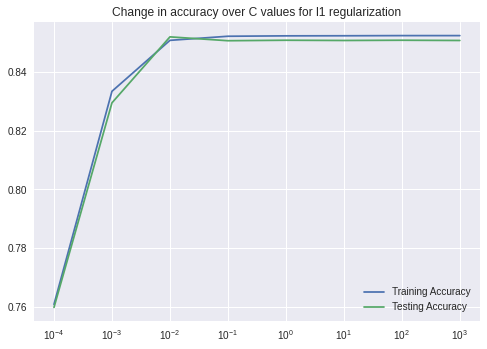

In [342]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

At c = 0.01 the best accuracy is achieved, that is 85%.

{0.0001: 0.8308739137563536,
 0.001: 0.8448106246925725,
 0.01: 0.8505492703721922,
 0.1: 0.8507132316773242,
 1: 0.8507952123298902,
 10: 0.8507952123298902,
 100: 0.8507132316773242,
 1000: 0.8507132316773242}

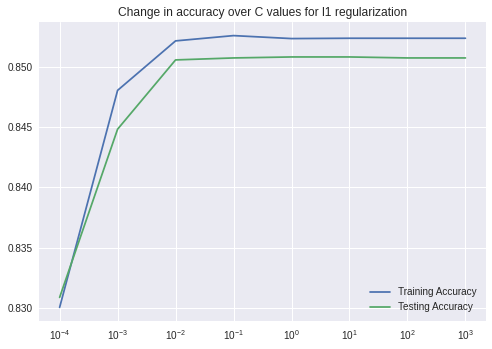

In [344]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

At c = 0.01, the model achieves its best accuracy bu overfitting is noticed to occur just before and thereafter.

Decision Tree Classification Model gave an accuracy of 81.55% but with overfitting. Decision tree classification model achieved 86.07% accuracy with Logistic Regression model achieving: L1 tuning at 85.19% and with L2 tuning at 85.07%.

In this case the Decision Tree Classification model is most suitable to be deployed.